In [1]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
db = pd.read_csv("./MICRODADOS_ENEM_2022.csv", sep=';', encoding='ISO-8859-1')
db.dropna(inplace=True)
db.reset_index(drop=True, inplace=True)
raca = db['TP_COR_RACA']
sexo = db['TP_SEXO']
tp_escola = db['TP_ESCOLA']
target = db['NU_NOTA_MT']
nota_lc = db['NU_NOTA_LC']
nota_ch = db['NU_NOTA_CH']
nota_cn = db['NU_NOTA_CN']

In [3]:
total_pessoas = len(raca)
raca = pd.Categorical(raca)
raca = raca.rename_categories(['ND', 'Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena'])
lista_racas = ['ND', 'Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena']

l_contagem_raca = []

for i in lista_racas:
    raca2 = list(raca)
    l_contagem_raca.append(raca2.count(i))

db['TP_COR_RACA'] = raca



Analise da variavel Target comparada a diferentes racas

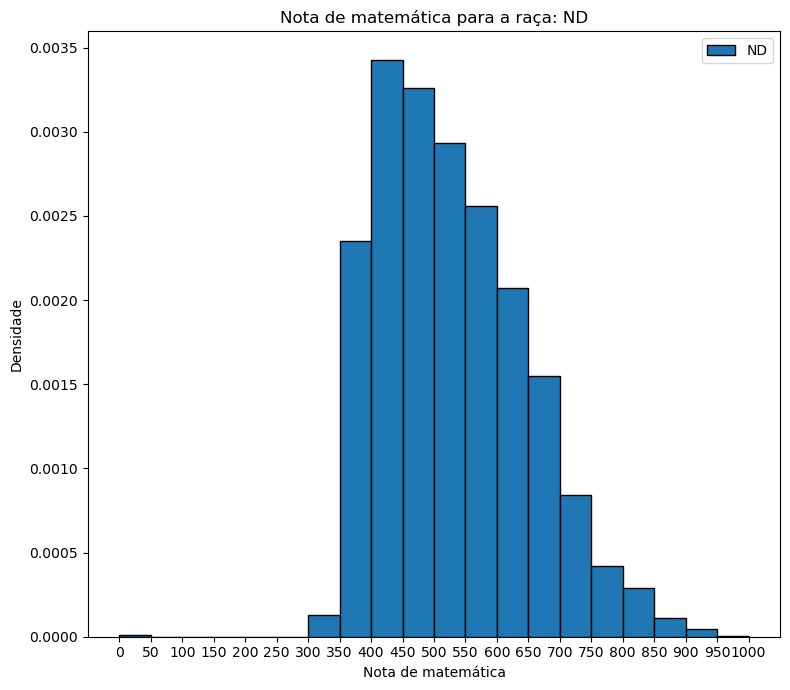

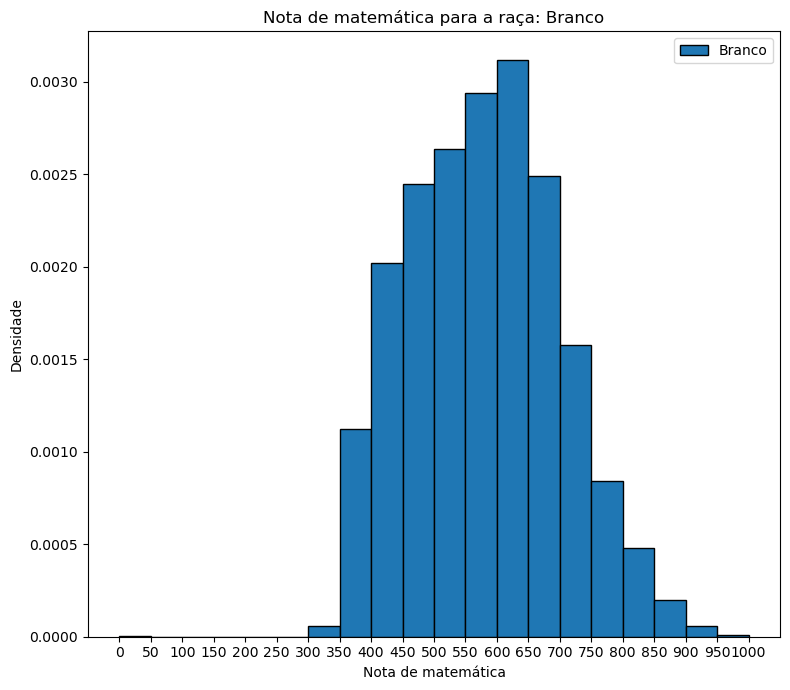

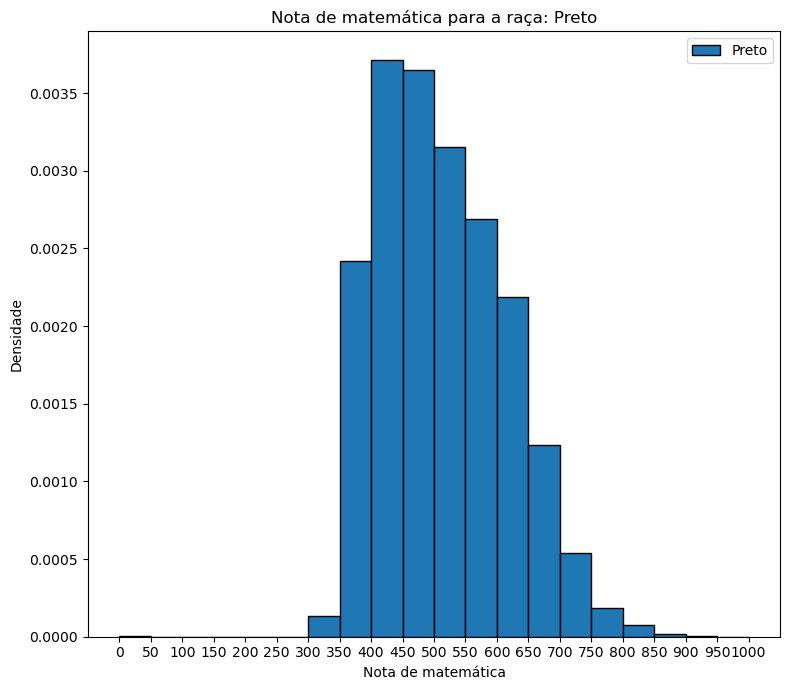

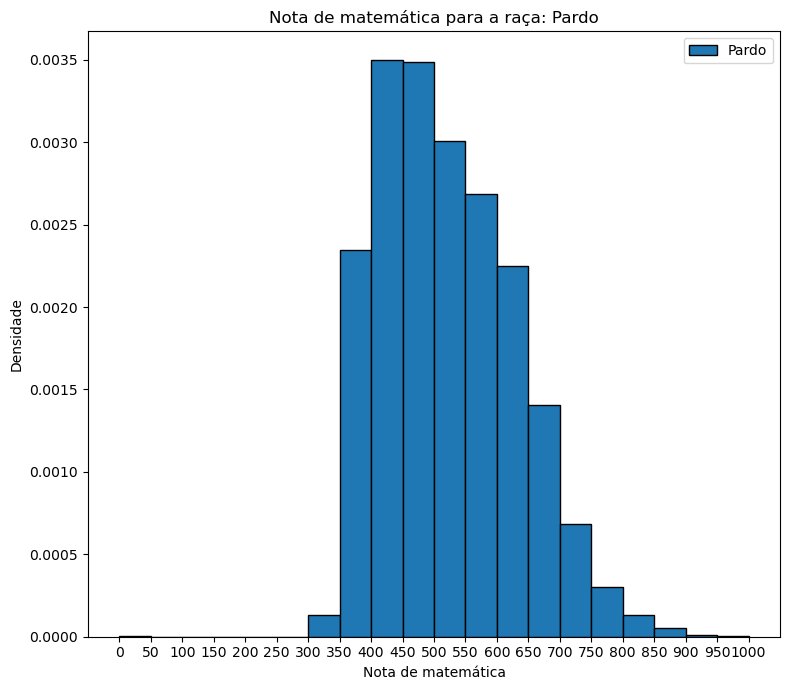

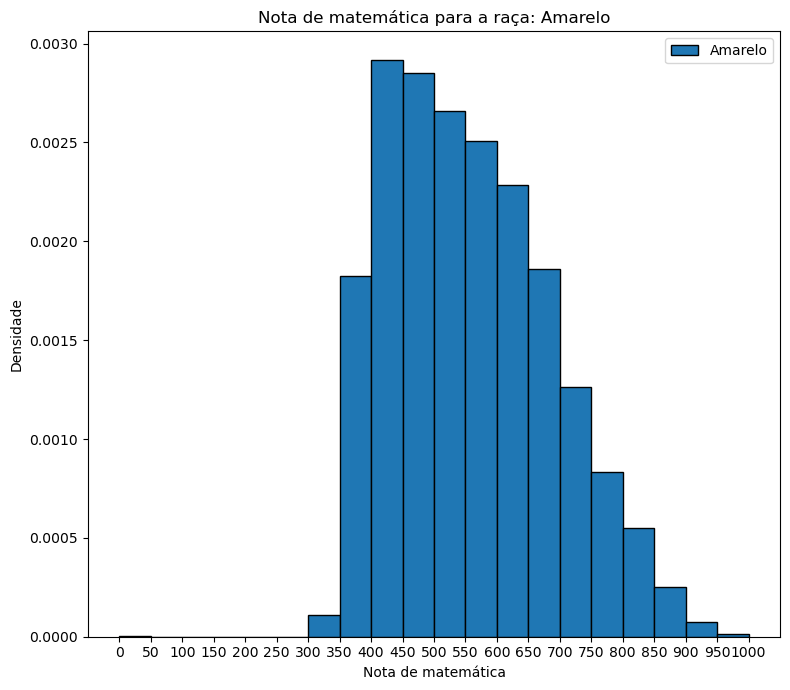

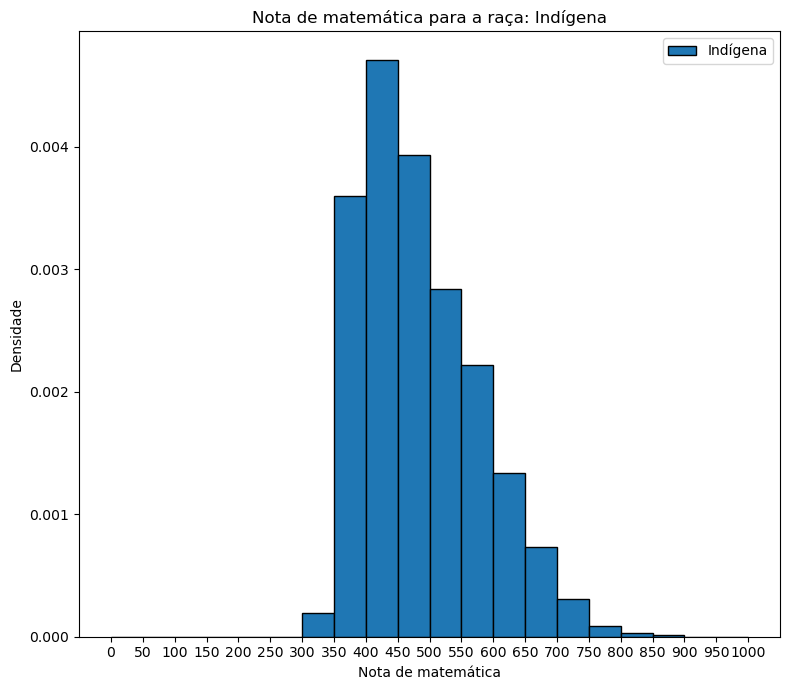

In [4]:

for i in range(len(lista_racas)):
    nota_raca_atual = db.loc[db.TP_COR_RACA == lista_racas[i], 'NU_NOTA_MT']
    lim = np.linspace(0, 1000, 21)
    plt.figure(figsize=(8, 7))
    #plt.hist(l_contagem_raca[i]/total_pessoas, bins=lim, edgecolor='black', density=True, label=i)
    plt.hist(nota_raca_atual, bins=lim, edgecolor='black', density=True, label=lista_racas[i])
    plt.title(f'Nota de matemática para a raça: {lista_racas[i]}')
    plt.ylabel('Densidade')
    plt.xlabel('Nota de matemática')
    plt.xticks(lim)
    plt.legend()
    plt.tight_layout()
    plt.show()






Analise da variavel Target comparada a diferentes sexos

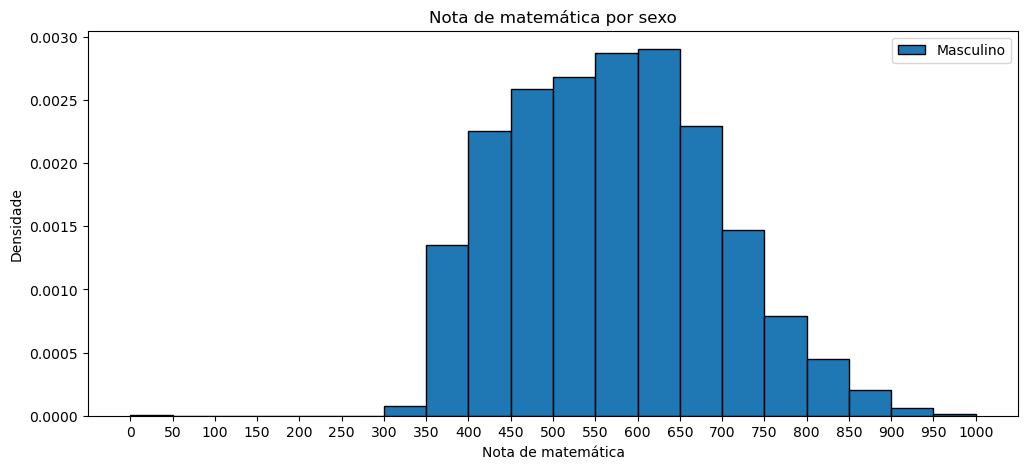

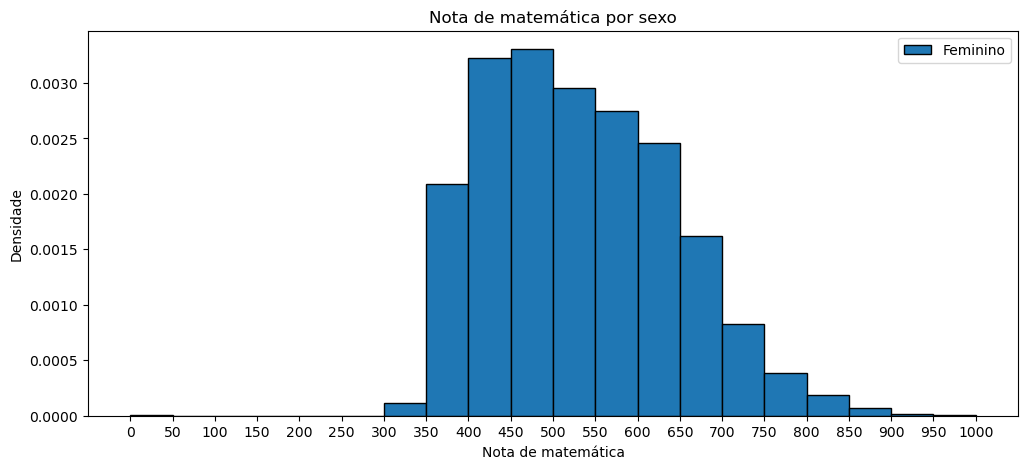

In [5]:
nota_M = db.loc[db.TP_SEXO == 'M', 'NU_NOTA_MT']
nota_F = db.loc[db.TP_SEXO == 'F', 'NU_NOTA_MT']


amp = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_M, bins=amp, edgecolor='black', density=True, label='Masculino')
plt.title('Nota de matemática por sexo')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(amp)
plt.legend()
plt.show()

amp1 = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_F, bins=amp1, edgecolor='black', density=True, label='Feminino')
plt.title('Nota de matemática por sexo')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(amp1)
plt.legend()
plt.show()



Analise da variavel Target comparada a diferentes tipos de escola

Series([], Name: NU_NOTA_MT, dtype: float64)


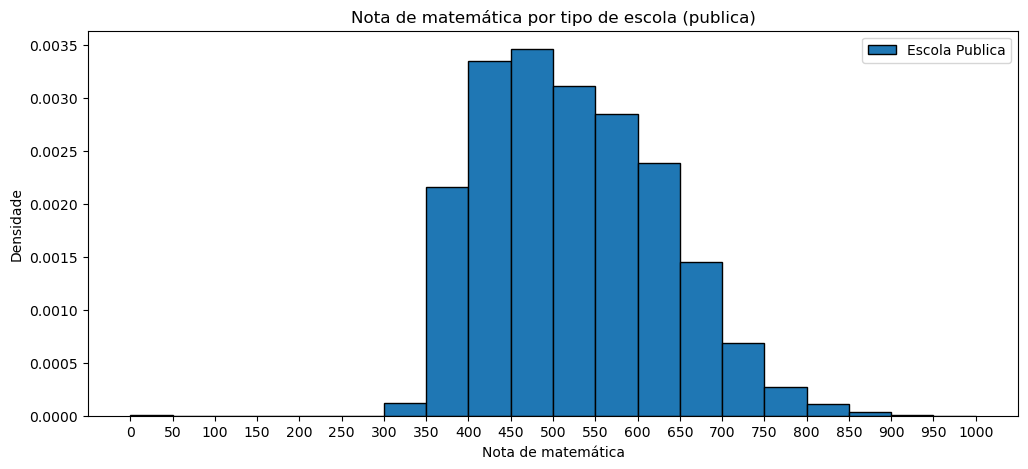

c:\Users\eduar\anacon\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


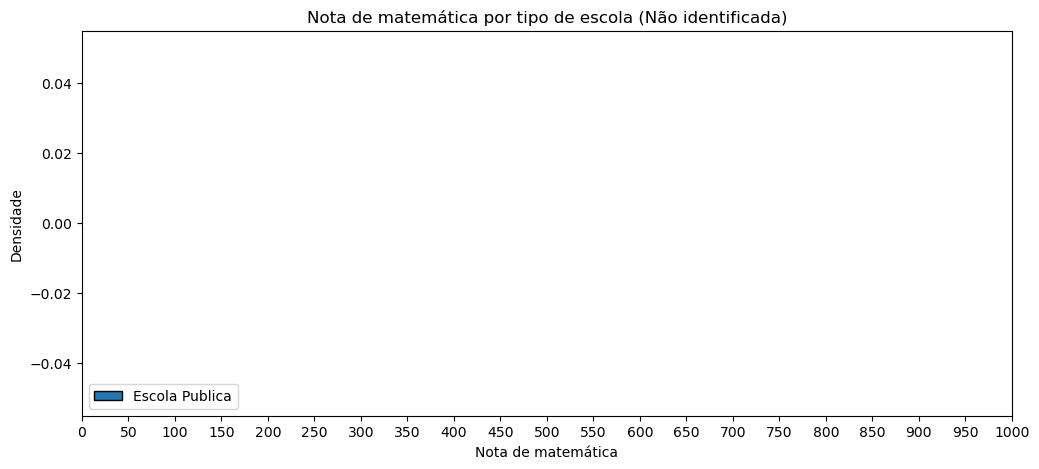

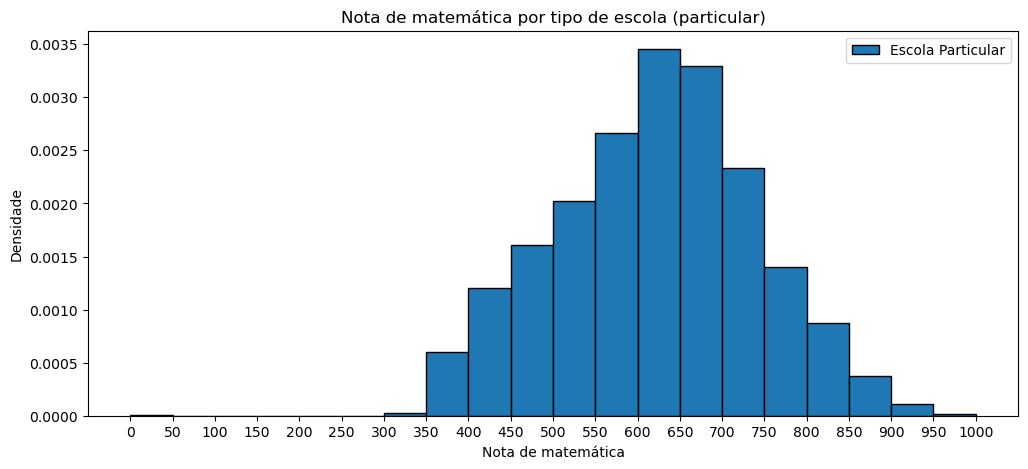

In [6]:
nota_nao_falou = db.loc[db.TP_ESCOLA == 1, 'NU_NOTA_MT']
nota_Part = db.loc[db.TP_ESCOLA == 3, 'NU_NOTA_MT']
nota_Pub = db.loc[db.TP_ESCOLA == 2 , 'NU_NOTA_MT']

#1: Não declarou, 2: Publica, 3: Particular
print(nota_nao_falou)


lim = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_Pub, bins=amp, edgecolor='black', density=True, label='Escola Publica')
plt.title('Nota de matemática por tipo de escola (publica)')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(lim)
plt.legend()
plt.show()

lim = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_nao_falou, bins=amp, edgecolor='black', density=True, label='Escola Publica')
plt.title('Nota de matemática por tipo de escola (Não identificada)')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(lim)
plt.legend()
plt.show()

lim = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_Part, bins=amp, edgecolor='black', density=True, label='Escola Particular')
plt.title('Nota de matemática por tipo de escola (particular)')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(lim)
plt.legend()
plt.show()

Separando o Dataframe em Train e Test  com proporção de 0.7 e 0.3 respectivamente e divindo em X (paremetros de regressão) e Y (regressor).


In [7]:
train, test = train_test_split(db, test_size=0.3, random_state=42, shuffle=True)

#seleciona as variaveis quali no dataset de treino
X_train = train.loc[:,['TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_STATUS_REDACAO','TP_ESCOLA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','IN_TREINEIRO']]

#seleciona as variaveis quanti no dataset de treino
Y_train = train.loc[:,['NU_NOTA_MT']]
 

#seleciona as variaveis quali no dataset de teste
X_test = test.loc[:,['TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_STATUS_REDACAO','TP_ESCOLA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','IN_TREINEIRO']]

#seleciona as variaveis quanti no dataset de teste
Y_test = test.loc[:,['NU_NOTA_MT']]

Random Forest Regression

O modelo de random forest regression divide de forma aleatoria sua base de treino e teste em varias arvores diferentes, cujo quais tem mais ou menos niveis de decisões dependendo da profundidade, em geral profundidades menores não capturam a base de dados perfeitamente, enquanto uma profundidade muito grande tira a capacidade do modelo de prever dados não inclusos na base, pois o modelo se conforma demais aos dados fornecidos. Cada arvore analisa, de forma idependente, o conjunto da sub-base de dados, focando apenas em algumas variaveis preditoras para prever a nota final do aluno. Após todas as arvores chegarem a uma predição o modelo faz um media aritimetica para determinar a previsão final.

In [8]:
# RANDOM FOREST REGRESSION
# ignora ater a hora de implementar
l_mean_p = []
l_mean_a = []
r2_scor = []
rmse_results = []

for i in range(30):
    #random forest regression
    model_RFR = RandomForestRegressor(n_estimators=i+1)
    model_RFR.fit(pd.get_dummies(X_train), Y_train)
    Y_pred = model_RFR.predict(pd.get_dummies(X_test))
 
    #metricas de analise
    l_mean_p.append(mean_absolute_percentage_error(Y_test, Y_pred))
    l_mean_a.append(mean_absolute_error(Y_test, Y_pred))
    r2_scor.append(r2_score(Y_test, Y_pred))
    rmse_results.append(mean_squared_error(Y_test, Y_pred, squared= False))

C:\Users\eduar\AppData\Local\Temp\ipykernel_71648\2775166165.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(pd.get_dummies(X_train), Y_train)
C:\Users\eduar\AppData\Local\Temp\ipykernel_71648\2775166165.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(pd.get_dummies(X_train), Y_train)
C:\Users\eduar\AppData\Local\Temp\ipykernel_71648\2775166165.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(pd.get_dummies(X_train), Y_train)
C:\Users\eduar\AppData\Local\Temp\ipykernel_71648\2775166165.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Avaliando Random Forest

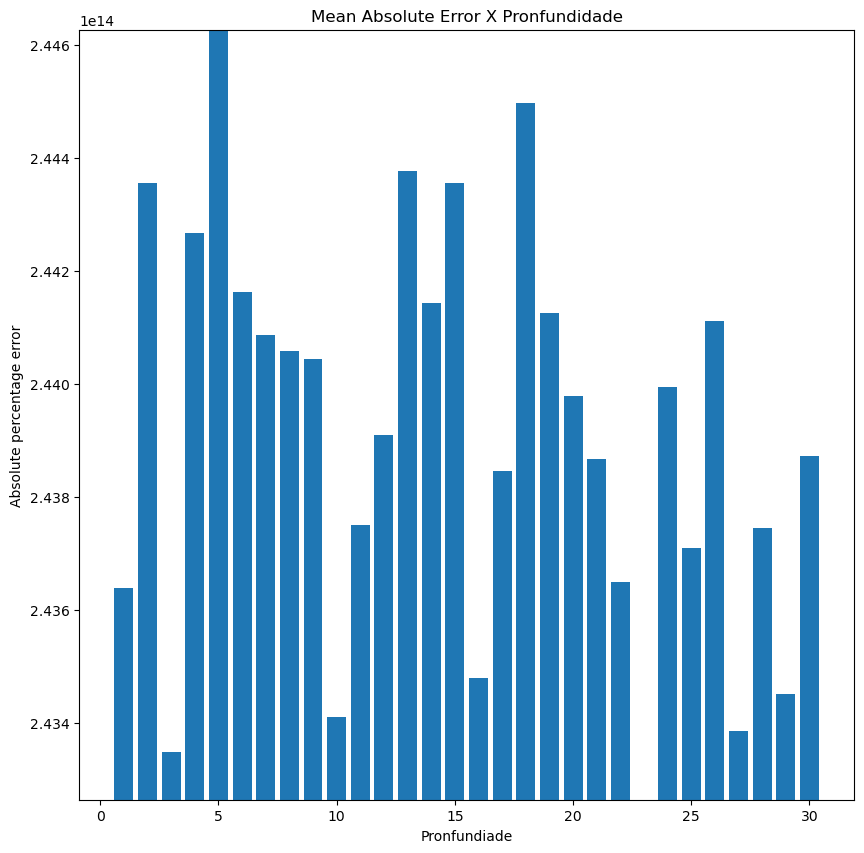

83.2289674535037 83.09222228913018


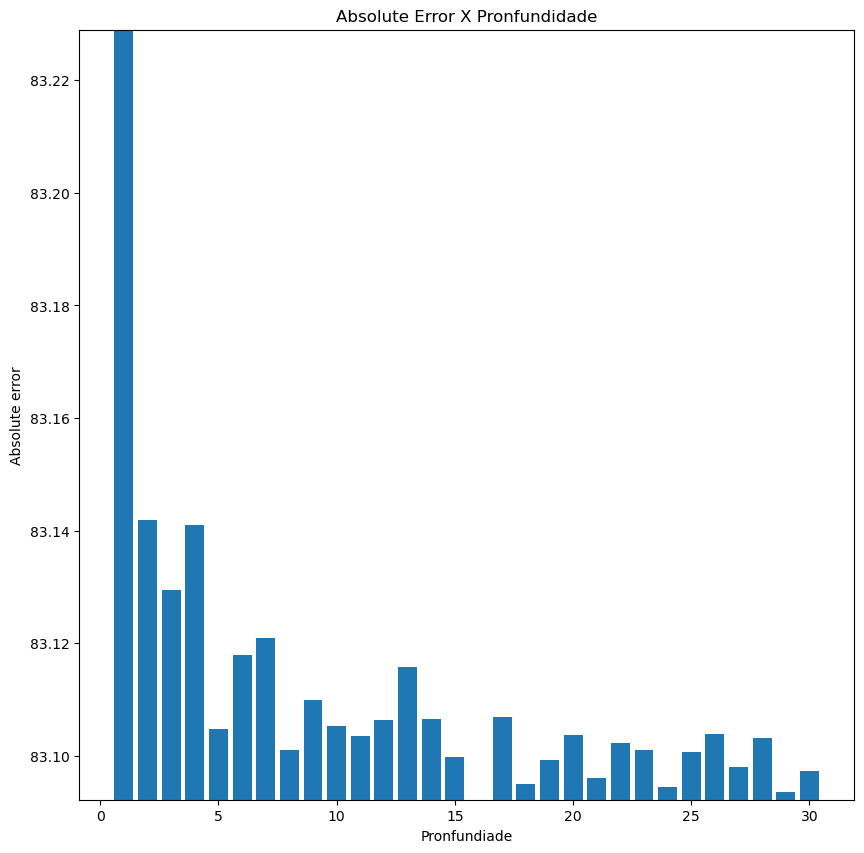

0.21827030640294698 0.21572289280638224


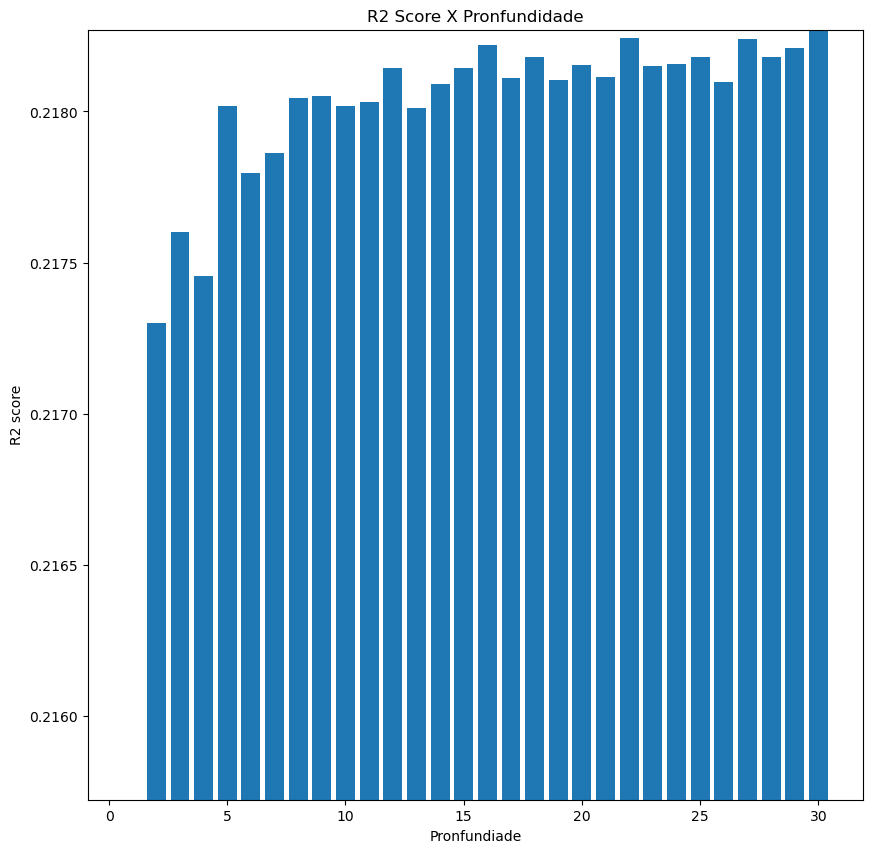

102.61895039366192 102.45215633157461


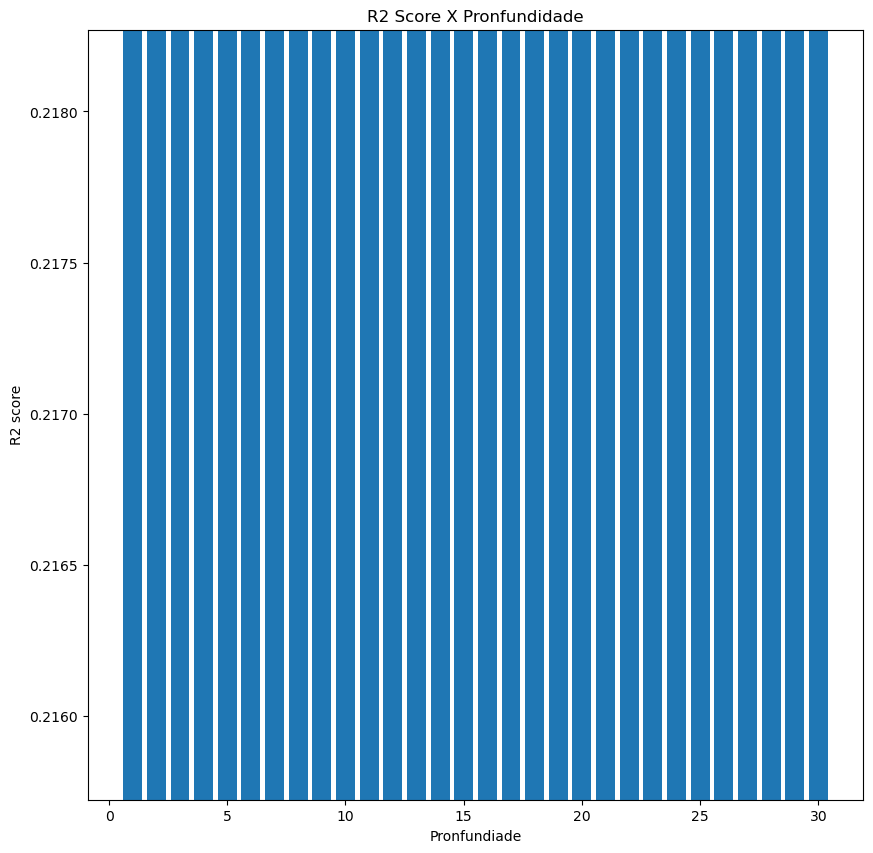

In [9]:
l_numeros = np.arange(1,31,1)

#graficos dos dados das metricas de analise
plt.figure(figsize=(10,10))
plt.bar(l_numeros,l_mean_p)
plt.title('Mean Absolute Error X Pronfundidade')
plt.xlabel('Pronfundiade')
plt.ylabel('Absolute percentage error')
plt.ylim(min(l_mean_p) - 0.0001, max(l_mean_p))
plt.show()

print(max(l_mean_a), min(l_mean_a))
plt.figure(figsize=(10,10))
plt.bar(l_numeros,l_mean_a)
plt.title('Absolute Error X Pronfundidade')
plt.xlabel('Pronfundiade')
plt.ylabel('Absolute error')
plt.ylim(min(l_mean_a), max(l_mean_a))
plt.show()

print(max(r2_scor), min(r2_scor))
plt.figure(figsize=(10,10))
plt.bar(l_numeros,r2_scor)
plt.title('R2 Score X Pronfundidade')
plt.xlabel('Pronfundiade')
plt.ylabel('R2 score')
plt.ylim(min(r2_scor), max(r2_scor))
plt.show()

print(max(rmse_results), min(rmse_results))
plt.figure(figsize=(10,10))
plt.bar(l_numeros,rmse_results)
plt.title('R2 Score X Pronfundidade')
plt.xlabel('Pronfundiade')
plt.ylabel('R2 score')
plt.ylim(min(r2_scor), max(r2_scor))
plt.show()

Linear Regression

A regressão linear é usada para encontrar uma linha minimize a soma dos quadrados dos desvios verticais, no caso desse projeto fazemos a multi regressão linear, onde cada variavel preditora adiciona uma nova dimensão ao gráfico, e como usamos 14 delas, infelizmente não é possivel projetar o gráfico desta linha, pois o mesmo teria 14 dimensões. Porm o odelo continua encontrando um reta que minimize a soma dos quadrados por meio do método dos minimos quadrados (MMQ), a diferença é que temos 14 coeficientes angulares ao inves de 1.

In [10]:
# regressão linear
model_linear = LinearRegression()

model_linear.fit(pd.get_dummies(X_train), Y_train)
Y_pred = model_linear.predict(pd.get_dummies(X_test))



Aviliando Linear regression

In [11]:
#metricas de analise
print(mean_absolute_percentage_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred, squared= False)) #RMSE

241995280241189.1
83.76542522501468
0.20929260289322438
103.0387781204054


Comparando os dois Modelos

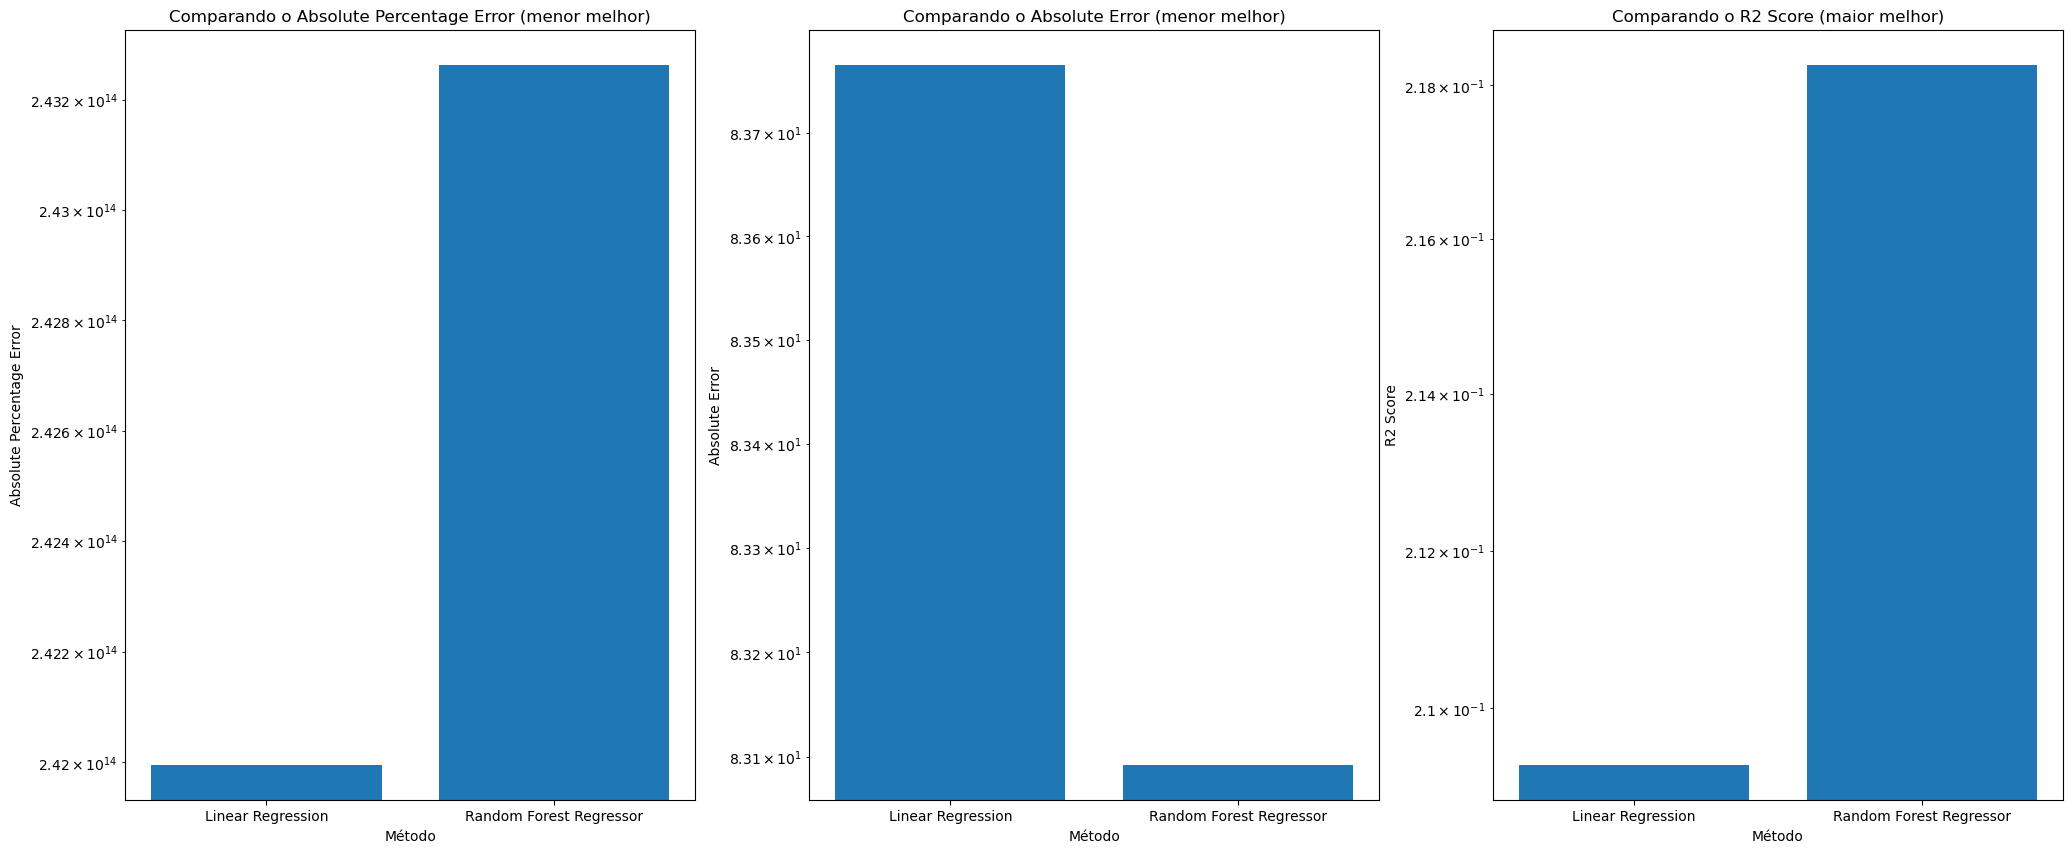

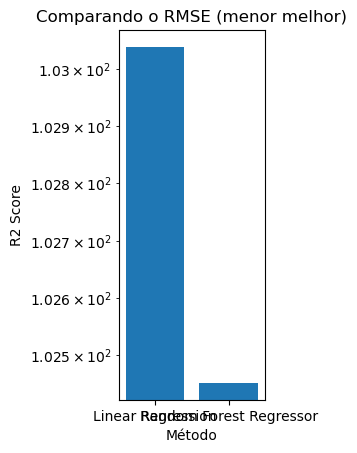

In [12]:
l_mean_all = [mean_absolute_percentage_error(Y_test, Y_pred),min(l_mean_p)]
l_absolute_all = [mean_absolute_error(Y_test, Y_pred),min(l_mean_a)]
l_score_all = [r2_score(Y_test, Y_pred),max(r2_scor)]
l_rmse_all = [mean_squared_error(Y_test, Y_pred, squared= False),min(rmse_results)]
l_x = ['Linear Regression','Random Forest Regressor']

#graficos para a comparação dos dois métodos
fig = plt.figure(figsize=(25,10))

plt.subplot(131)
plt.bar(l_x ,l_mean_all)
plt.title('Comparando o Absolute Percentage Error (menor melhor)')
plt.yscale('log')
plt.xlabel('Método')
plt.ylabel('Absolute Percentage Error')

plt.subplot(132)
plt.bar(l_x ,l_absolute_all)
plt.title('Comparando o Absolute Error (menor melhor)')
plt.yscale('log')
plt.xlabel('Método')
plt.ylabel('Absolute Error')

plt.subplot(133)
plt.bar(l_x ,l_score_all)
plt.title('Comparando o R2 Score (maior melhor)')
plt.yscale('log')
plt.xlabel('Método')
plt.ylabel('R2 Score')
plt.show()

plt.subplot(133)
plt.bar(l_x ,l_rmse_all)
plt.title('Comparando o RMSE (menor melhor)')
plt.yscale('log')
plt.xlabel('Método')
plt.ylabel('R2 Score')
plt.show()

Explicando as métricas utilizadas

Métricas de desemprenho utilizadas:

    Absolute Percentage Error:

        Essa métrica calcula a media das diferenças absolutas entre a predição e o valor real em relação aos valores reais.
        pelo meio da somatoria do modulo dessa equação:(valor_previsto - valor_real)/valor_real. E por fim multiplica-se o valor da somatoria por 100 e por 1/numero_amostras.


    Absolute Error:

        Essa metrica é simplesmente a somatoria do modulo do (valor_previsto - valor_real) * 1/numero_amostras


    R2 Score:

        Essa métrica calcula a proporção da variabilidade nos dados previstos pelo modelo. Ela varia de 0 a 1, sendo 1 um modelo perfeito. Entre tanto ela pode varia entre 0 a -100, indicando que a média da sua base, em X% dos casos é mais eficaz em prever o resultado real que seu modelo.


    RMSE:
        E
        Essa métrica mede a média da somatoria das variancias entre valor real e valor previsto, penalizando erros muito grandes e relevando erros pequenos.



    






Concluindo

A Random forest regression é marginalmente melhor que a Multi regressão linear, note que a escala dos gráficos é logaritimica, oque significa que na verdade, a diferença da acurácia desses modelos é muito pequena, assim fica constado a incapacidade dos modelos de prever a nota de matematica de uma canditado baseado em suas variaveis qualitativas declaradas na hora da inscrição ao ENEM.

O R2 score de ambos é considerado aquem do ideal (0.9), ambos girando em torno de 0.2.